# Fonte e sumidouro em corrente livre

Começando por importar as bibliotecas utilizadas

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
#para plotar os gráficos em linha
%matplotlib inline

Vamos criar a malha para plotar o campo de velocidades e visualizar as linhas de corrente. 

Assim como no caderno anterior:

In [2]:
n_points = 200 #número de pontos em cada direção no espaço
x_start, x_end = -4.0,4.0
y_start, y_end = -2.0,2.0
x = np.linspace(x_start, x_end, n_points)
y = np.linspace(y_start, y_end, n_points)


X, Y = np.meshgrid(x,y)

## Fonte em um fluxo uniforme

As linhas de corrente dada por por um fluxo livre com velocidade $\bold{U_\infty}$ e angulo de incidencia $\bold{\alpha}$ é dado por:

$$ \psi_{fluxo\ livre} (x,y) = U_\infty (y\cos \alpha - x \sin \alpha) $$

In [3]:
u_inf = 1.0 #velocidade do fluxo livre

#Calculando o cálculo do campo de velocidades do fluxo livre
u_flivre = u_inf*np.ones((n_points,n_points), dtype=float)
v_flivre = np.zeros((n_points,n_points), dtype=float)

#cálculo da função corrente
psi_flivre = u_inf*Y

A fórmula da função corrente para uma fonte localizada em $\bold{(x_{fonte},y_{fonte})}$ é:

$$ \psi_{fonte} (x,y) = \frac{\sigma}{2\pi}\bigg( \frac{y-y_{fonte}}{x-x_{fonte}} \bigg) $$

e as componentes da velocidade são:

$$ u_{fonte} (x,y)  = \frac{\sigma}{2\pi}\frac{x-x_{fonte}}{(x-x_{fonte})^2 + (y-y_{fonte})^2} $$

$$ v_{fonte} (x,y)  = \frac{\sigma}{2\pi}\frac{y-y_{fonte}}{(x-x_{fonte})^2 + (y-y_{fonte})^2} $$

Vamos definir a função get_velocity( ), ela ira receber a força da singularidade, sua localização $(x_s,y_s)$ e a malha.

In [4]:
def get_velocity(forca, xs, ys, X, Y):

    """
    Retorna o campo de velocidades dado uma fonte/sumidouro

    Parametros
    ---------
    forca:float
        força da fonte/sumidouro
    xs: float
        coordenada x da fonte/sumidouro
    ys: float
        coordenada y da fonte/sumidouro
    X: Array numpy 2D de float
        coorddenadas x da malha de pontos
    Y: Array numpy 2D de float
        coorddenadas y da malha de pontos

    Retorna
    ---------
    u: array numpy 2D de float
        componentes x do campo vetorial de velocidades
    v: array numpy 2D de float
        componentes y do campo vetorial de velocidades
    """

    u = forca/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = forca/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)

    return u, v

Da mesma forma, iremos criar a função get_stream_function( ) para encontrar a função corrente gerada por uma fonte/sumidouro

In [5]:
def get_stream_function(forca, xs, ys, X, Y):
    """
    Retorna a função corrente gerada por uma fonte/sumidouro

    Parametros
    ---------
    forca:float
        força da fonte/sumidouro
    xs: float
        coordenada x da fonte/sumidouro
    ys: float
        coordenada y da fonte/sumidouro
    X: Array numpy 2D de float
        coorddenadas x da malha de pontos
    Y: Array numpy 2D de float
        coorddenadas y da malha de pontos

    Retorna
    ---------
    u: array numpy 2D de float
        componentes x do campo vetorial de velocidades
    v: array numpy 2D de float
        componentes y do campo vetorial de velocidades
    """
    psi = forca/(2*np.pi)*np.arctan2((Y-ys),(X-xs))

    return psi

Agora podemos calcular o campo de velocidades e a função corrente utilizando as duas funções criadas. Com isso, poderemos adicionar outras singularidades com mais facilidade.

In [6]:
forca_fonte = 5.0
x_fonte, y_fonte = -1.0, 0.0

#calculando o campo de velocidades
u_fonte, v_fonte = get_velocity(forca_fonte, x_fonte, y_fonte, X, Y)

#calculando a função corrente
psi_fonte = get_stream_function(forca_fonte, x_fonte, y_fonte, X, Y)

Usando o princípio da sobreposição. As linhas de corrente em um fluxo livre são dadas por:

$$ \psi = \psi_{fluxo\ livre} + \psi_{fonte} = U_\infty y + \frac{\sigma}{2\pi}\arctan \bigg(\frac{y-y_{fonte}}{x-x_{fonte}}\bigg) $$

O mesmo se aplica às velocidades:

$$ u = u_{fluxo\ livre} + u_{fonte} $$
$$ v = v_{fluxo\ livre} + u_{fonte} $$

Os pontos de estagnação são pontos em que a velocidade é zero e podemos encontra-los resolvendo as seguintes equações:

$$ u = 0,\ v = 0 $$

que leva à:

$$ x_{estagnacão} = x_{fonte} - \frac{\sigma}{2\pi U_\infty} $$
$$ y_{estagnacão} = y_{fonte} $$

A linha de corrente que contém um ponto de estagnação é chamado de linha de corrente divisória. Ela separa o fluido vindo da corrente livre do fluido radiando da fonte. No plot será adicionada uma linha vermelha para evidenciar a linha divisória.

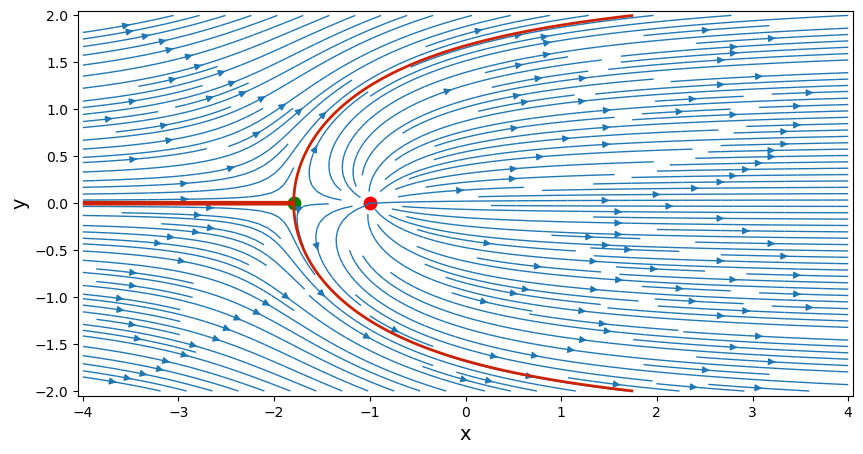

In [7]:
#superposição da fonte e corrente livre

u = u_flivre + u_fonte
v = v_flivre + v_fonte
psi = psi_flivre + psi_fonte

#plotando as linhas de corrente
width = 10.0
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_start-0.05, x_end+0.05)
plt.ylim(y_start-0.05, y_end+0.05)

plt.streamplot(X,Y,u,v,
               density = 2, linewidth=1, arrowsize=1, arrowstyle='-|>')
plt.scatter(x_fonte, y_fonte, color = 'red', s = 80, marker='o')

#Calculando o ponto de estagnação
x_estagnacao = x_fonte - forca_fonte/(2*np.pi*u_inf)
y_estagnacao = y_fonte

#Plotagem do ponto de estagnação
plt.scatter(x_estagnacao, y_estagnacao, color = 'green', s = 80, marker = 'o')

#Plotagem da linha divisória
plt.contour(X, Y, psi,
            levels = [- forca_fonte/2, forca_fonte/2],
            colors = "#CD2305", linewidths = 2, linestyles = "solid")

No plot podemos ver como a fonte influencia a corrente livre, de certa forma é como se tivesse um obstáculo no ponto verde que força as linhas de correte a se separarem.

## Dipolo em uma corrente uniforme

Para vermos a influencia de um dipolo podemos utilizar nossas funções get_velocity( ) e get_stream_function( ) para incluir um sumidouro.

In [8]:
forca_sumidouro = -5.0
x_sumidouro, y_sumidouro = 1.0, 0.0

#calculando o campo de velocidades do sumidouro
u_sumidouro, v_sumidouro = get_velocity(forca_sumidouro, x_sumidouro, y_sumidouro, X, Y)
psi_sumidouro   =   get_stream_function(forca_sumidouro, x_sumidouro, y_sumidouro, X, Y)

E agora basta fazermos a sobreposição com a corrente livre e a fonte

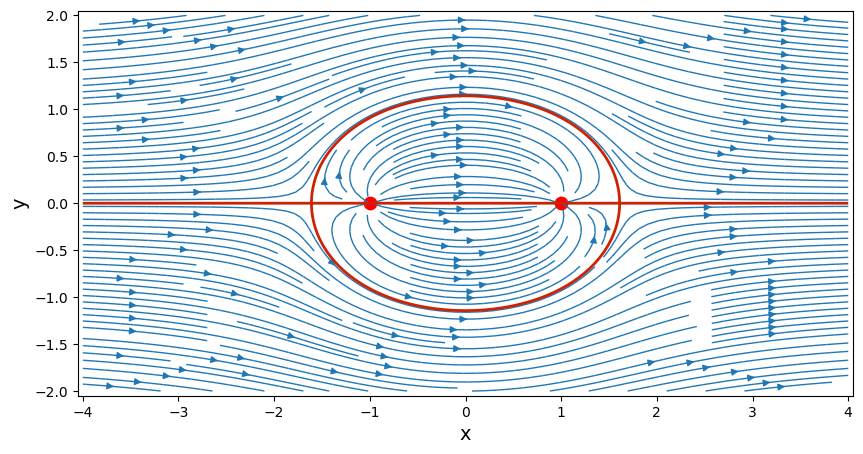

In [10]:
u = u_flivre + u_fonte + u_sumidouro
v = v_flivre + v_fonte + v_sumidouro
psi = psi_flivre + psi_fonte + psi_sumidouro

#plot das linhas de corrente
width = 10.0
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_start-0.05, x_end+0.05)
plt.ylim(y_start-0.05, y_end+0.05)

plt.streamplot(X,Y,u,v,
               density = 2, linewidth=1, arrowsize=1, arrowstyle='-|>')
plt.scatter([x_fonte,x_sumidouro], [y_fonte, y_sumidouro], color = 'red', s = 80, marker='o')

#Plotagem da linha divisória
plt.contour(X, Y, psi,
            levels = [0.],
            colors = "#CD2305", linewidths = 2, linestyles = "solid")


O plot mostra que o dipolo age na corrente livre como se fosse um corpo sólido em formato oval. Podemos colocar mais fonte e sumidouros para ver os impactos desses na corrente livre.

## Equação de Bernoulli e o coeficiente de pressão

Uma medida muito útil para medir um fluxo envolta de um corpo é medir o coeficiente de pressão $\bold{C_p}$. Para obter o valor dessa medida, aplica-se a equação de Bernoulli para fluido incompressível:

$$ p_\infty + \frac{1}{2}\rho V^2_\infty = p + \frac{1}{2}\rho V^2 $$

Nós definimos o coeficiente de pressão como:

$$ C_p = \frac{p-p_\infty}{1/2 \rho V^2_\infty} $$

ou,

$$ C_p = 1 - \bigg(\frac{V}{V_\infty}\bigg)^2 $$

Para um fluido incompressível, temos que $\bold{C_p = 1}$ no ponto de estagnação.

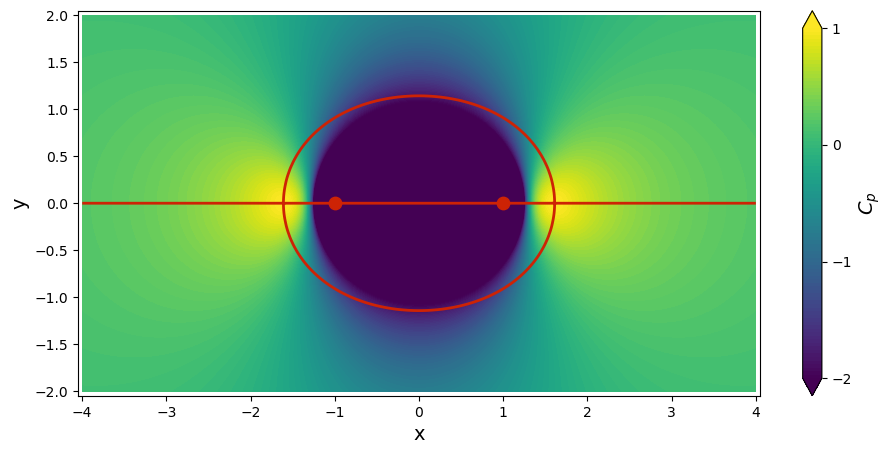

In [13]:
#calculo do campo do coeficiente de pressão
cp = 1.0 - (u**2+v**2)/u_inf**2

#plotagem do campo do coeficiente de pressão
width = 10
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize = (1.1*width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_start-0.05, x_end+0.05)
plt.ylim(y_start-0.05, y_end+0.05)

contf = plt.contourf(X,Y,cp,
                    levels = np.linspace(-2.0,1.0,100), extend = 'both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 14)
cbar.set_ticks([-2.0,-1.0,0.0,1.0])

plt.scatter([x_fonte, x_sumidouro],[y_fonte,y_sumidouro],
            color = '#CD2305', s=80, marker='o')
plt.contour(X,Y,psi,
            levels = [0.],colors = '#CD2305', linewidths = 2, linestyles = 'solid')